In [1]:
import wrds
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
conn = wrds.Connection()

# finding apples PERMNO
permno_df = conn.raw_sql("""
    SELECT permno
    FROM crsp.msenames
    WHERE ticker = 'AAPL'
      AND namedt <= '2024-12-31'
      AND nameendt >= '2010-01-01'
    LIMIT 1
""")
aapl_permno = int(permno_df.loc[0, 'permno'])
print("AAPL permno:", aapl_permno)

WRDS recommends setting up a .pgpass file.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done
AAPL permno: 14593


In [3]:
aapl_df = conn.raw_sql(f"""
    SELECT
      dlycaldt AS date,
      dlyclose AS close,
      dlyvol   AS volume,
      dlyretx  AS return,   -- price‐only return
      dlyhigh  AS high,
      dlylow   AS low
    FROM crsp.dsf_v2
    WHERE permno = {aapl_permno}
      AND dlycaldt BETWEEN '2010-01-01' AND '2024-12-31'
""")

aapl_df['date'] = pd.to_datetime(aapl_df['date'])
aapl_df.rename(columns={
    'close':'Close',
    'volume':'Volume',
    'return':'Return',
    'high':'High',
    'low':'Low'
}, inplace=True)

#dropping any bad rows
for col in ['Close','Volume','Return','High','Low']:
    aapl_df[col] = pd.to_numeric(aapl_df[col], errors='coerce')
aapl_df.dropna(subset=['Close','Volume','Return','High','Low'], inplace=True)
aapl_df = aapl_df.sort_values('date').reset_index(drop=True)

print(aapl_df[['date','Close','Return']].head())
print("Total rows:", len(aapl_df))
print("Return range:", aapl_df['Return'].min(), "to", aapl_df['Return'].max())


        date   Close    Return
0 2010-01-04  214.01  0.015555
1 2010-01-05  214.38  0.001729
2 2010-01-06  210.97 -0.015906
3 2010-01-07  210.58 -0.001849
4 2010-01-08  211.98  0.006648
Total rows: 3774
Return range: -0.128647 to 0.119808


In [4]:
#Adding technical indicators

import ta

# RSI
aapl_df['RSI'] = ta.momentum.RSIIndicator(aapl_df['Close'], window=14).rsi()

# BBW
bb = ta.volatility.BollingerBands(aapl_df['Close'], window=20, window_dev=2)
aapl_df['BB_width'] = bb.bollinger_wband()

# ATR
aapl_df['ATR'] = ta.volatility.AverageTrueRange(
    high=aapl_df['High'], low=aapl_df['Low'], close=aapl_df['Close'], window=14
).average_true_range()

# MACD
aapl_df['MACD'] = ta.trend.MACD(
    aapl_df['Close'], window_slow=26, window_fast=12, window_sign=9
).macd()

# Momentum
aapl_df['Momentum'] = ta.momentum.ROCIndicator(aapl_df['Close'], window=10).roc()

# Drop rows with any nans
aapl_df.dropna(subset=['RSI','BB_width','ATR','MACD','Momentum'], inplace=True)
aapl_df.reset_index(drop=True, inplace=True)

print(aapl_df[['date','Return','RSI','BB_width','ATR','MACD','Momentum']].head())


        date    Return        RSI   BB_width       ATR      MACD  Momentum
0 2010-02-09  0.010664  42.053737  13.929478  5.838093 -4.503962 -4.734389
1 2010-02-10 -0.005474  40.996024  14.039966  5.588229 -4.405262 -6.141887
2 2010-02-11  0.018215  45.849609  13.482261  5.595498 -3.994220 -0.311104
3 2010-02-12  0.008607  48.063310  12.933437  5.634391 -3.490250   4.33035
4 2010-02-16  0.015071  51.810176  12.772908  5.468363 -2.814715  4.452319


NVDA STOCK (TECH)

In [5]:
# finding nvidias PERMNO
permno1_df = conn.raw_sql("""
    SELECT permno
    FROM crsp.msenames
    WHERE ticker = 'NVDA'
      AND namedt <= '2024-12-31'
      AND nameendt >= '2010-01-01'
    LIMIT 1
""")
nvda_permno = int(permno1_df.loc[0, 'permno'])
print("NVDA permno:", nvda_permno)

NVDA permno: 86580


In [6]:
nvda_df = conn.raw_sql(f"""
    SELECT
      dlycaldt AS date,
      dlyclose AS close,
      dlyvol   AS volume,
      dlyretx  AS return,   -- price‐only return
      dlyhigh  AS high,
      dlylow   AS low
    FROM crsp.dsf_v2
    WHERE permno = {nvda_permno}
      AND dlycaldt BETWEEN '2010-01-01' AND '2024-12-31'
""")

nvda_df['date'] = pd.to_datetime(nvda_df['date'])
nvda_df.rename(columns={
    'close':'Close',
    'volume':'Volume',
    'return':'Return',
    'high':'High',
    'low':'Low'
}, inplace=True)

#dropping any bad rows
for col in ['Close','Volume','Return','High','Low']:
    nvda_df[col] = pd.to_numeric(nvda_df[col], errors='coerce')
nvda_df.dropna(subset=['Close','Volume','Return','High','Low'], inplace=True)
nvda_df = nvda_df.sort_values('date').reset_index(drop=True)

print(nvda_df[['date','Close','Return']].head())
print("Total rows:", len(nvda_df))
print("Return range:", nvda_df['Return'].min(), "to", nvda_df['Return'].max())

        date  Close    Return
0 2010-01-04  18.49 -0.010171
1 2010-01-05  18.76  0.014603
2 2010-01-06  18.88  0.006397
3 2010-01-07  18.51 -0.019598
4 2010-01-08  18.55  0.002161
Total rows: 3774
Return range: -0.187559 to 0.298067


In [7]:
# RSI
nvda_df['RSI'] = ta.momentum.RSIIndicator(nvda_df['Close'], window=14).rsi()

# Bollinger Bandwidth
bb = ta.volatility.BollingerBands(nvda_df['Close'], window=20, window_dev=2)
nvda_df['BB_width'] = bb.bollinger_wband()

# ATR
nvda_df['ATR'] = ta.volatility.AverageTrueRange(
    high=nvda_df['High'],
    low =nvda_df['Low'],
    close=nvda_df['Close'],
    window=14
).average_true_range()

# MACD
nvda_df['MACD'] = ta.trend.MACD(
    nvda_df['Close'],
    window_slow=26,
    window_fast=12,
    window_sign=9
).macd()

# Momentum (10‐day ROC)
nvda_df['Momentum'] = ta.momentum.ROCIndicator(nvda_df['Close'], window=10).roc()

# Drop any rows with NaNs in the new indicators
nvda_df.dropna(subset=['RSI','BB_width','ATR','MACD','Momentum'], inplace=True)
nvda_df.reset_index(drop=True, inplace=True)

# Preview the first few rows
print(nvda_df[['date','Return','RSI','BB_width','ATR','MACD','Momentum']].head())

        date    Return        RSI   BB_width       ATR      MACD   Momentum
0 2010-02-09  -0.00803  39.518029  15.603103  0.723666 -0.512151  -0.925355
1 2010-02-10  0.019303  43.548302  14.827789  0.705547 -0.478837  -1.681682
2 2010-02-11  0.045816  51.899394  13.426240  0.721579 -0.387450   6.401492
3 2010-02-12  0.013435  54.139931  12.888331  0.733967 -0.293088  12.735543
4 2010-02-16  0.018444  57.131807  13.816692  0.709398 -0.190290   6.638503


MSFT STOCK 

In [8]:
# finding msfts PERMNO
permno2_df = conn.raw_sql("""
    SELECT permno
    FROM crsp.msenames
    WHERE ticker = 'MSFT'
      AND namedt <= '2024-12-31'
      AND nameendt >= '2010-01-01'
    LIMIT 1
""")
msft_permno = int(permno2_df.loc[0, 'permno'])
print("MSFT permno:", msft_permno)

MSFT permno: 10107


In [9]:
msft_df = conn.raw_sql(f"""
    SELECT
      dlycaldt AS date,
      dlyclose AS close,
      dlyvol   AS volume,
      dlyretx  AS return,   -- price‐only return
      dlyhigh  AS high,
      dlylow   AS low
    FROM crsp.dsf_v2
    WHERE permno = {msft_permno}
      AND dlycaldt BETWEEN '2010-01-01' AND '2024-12-31'
""")

msft_df['date'] = pd.to_datetime(msft_df['date'])
msft_df.rename(columns={
    'close':'Close',
    'volume':'Volume',
    'return':'Return',
    'high':'High',
    'low':'Low'
}, inplace=True)

#dropping any bad rows
for col in ['Close','Volume','Return','High','Low']:
    msft_df[col] = pd.to_numeric(msft_df[col], errors='coerce')
msft_df.dropna(subset=['Close','Volume','Return','High','Low'], inplace=True)
msft_df = msft_df.sort_values('date').reset_index(drop=True)

print(msft_df[['date','Close','Return']].head())
print("Total rows:", len(msft_df))
print("Return range:", msft_df['Return'].min(), "to", msft_df['Return'].max())

        date   Close    Return
0 2010-01-04   30.95   0.01542
1 2010-01-05   30.96  0.000323
2 2010-01-06   30.77 -0.006137
3 2010-01-07  30.452 -0.010335
4 2010-01-08   30.66   0.00683
Total rows: 3774
Return range: -0.14739 to 0.142169


In [10]:
# RSI
msft_df['RSI'] = ta.momentum.RSIIndicator(msft_df['Close'], window=14).rsi()

# Bollinger Bandwidth
bb = ta.volatility.BollingerBands(msft_df['Close'], window=20, window_dev=2)
msft_df['BB_width'] = bb.bollinger_wband()

# ATR
msft_df['ATR'] = ta.volatility.AverageTrueRange(
    high=msft_df['High'],
    low =msft_df['Low'],
    close=msft_df['Close'],
    window=14
).average_true_range()

# MACD
msft_df['MACD'] = ta.trend.MACD(
    msft_df['Close'],
    window_slow=26,
    window_fast=12,
    window_sign=9
).macd()

# Momentum (10-day ROC)
msft_df['Momentum'] = ta.momentum.ROCIndicator(msft_df['Close'], window=10).roc()

# Drop any rows with NaNs in the new indicators
msft_df.dropna(subset=['RSI','BB_width','ATR','MACD','Momentum'], inplace=True)
msft_df.reset_index(drop=True, inplace=True)

# Preview the first few rows
print(msft_df[['date','Return','RSI','BB_width','ATR','MACD','Momentum']].head())

        date    Return        RSI   BB_width       ATR      MACD  Momentum
0 2010-02-09  0.010462  33.640272  14.872778  0.729580 -0.727400 -5.050847
1 2010-02-10 -0.000714  33.473838  15.196513  0.706038 -0.719130 -5.662285
2 2010-02-11  0.004645  35.700669  15.110233  0.705607 -0.694085 -3.566529
3 2010-02-12 -0.006757  33.913904  14.314346  0.693778 -0.681710 -0.887154
4 2010-02-16  0.015038  40.949415  13.063795  0.675651 -0.630741 -0.211193


AAPL ARIMAX(1,0,1) → MAE=0.01166, RMSE=0.01575


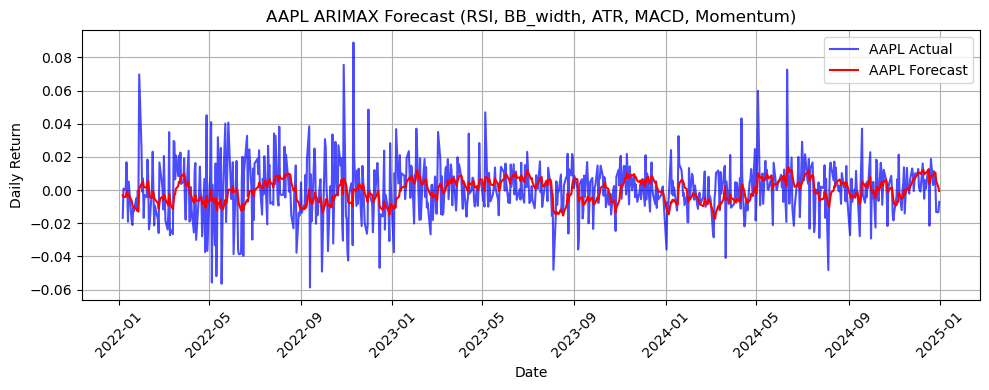

NVDA ARIMAX(1,0,1) → MAE=0.02474, RMSE=0.03354


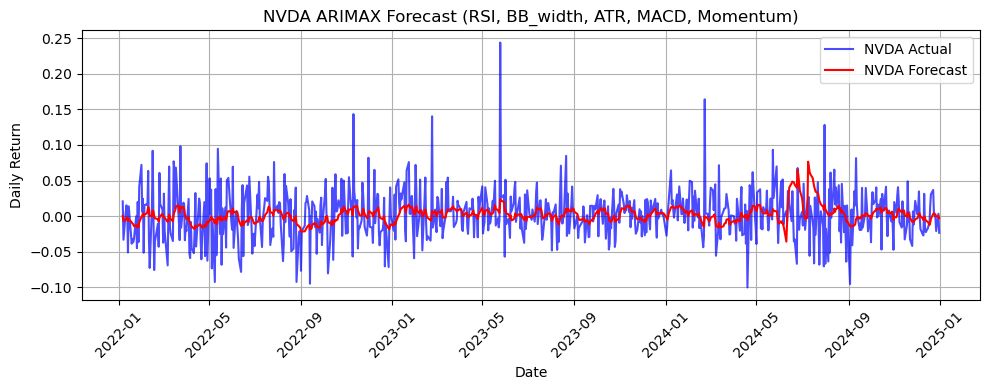

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSFT ARIMAX(1,0,1) → MAE=0.01273, RMSE=0.01736


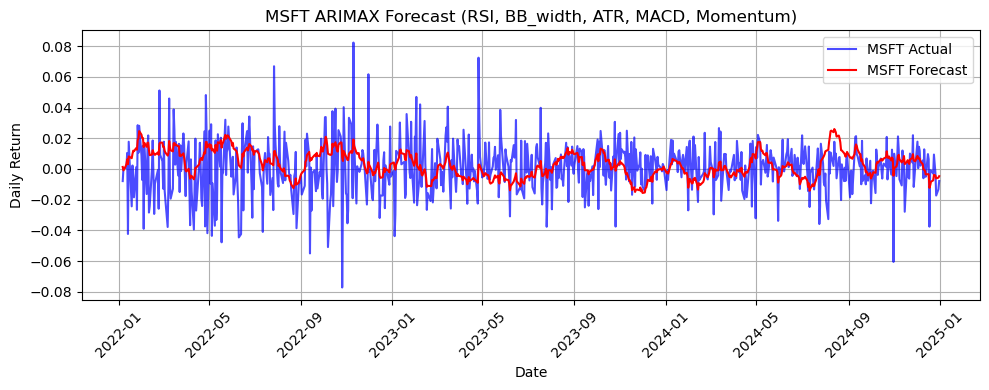

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics        import mean_squared_error, mean_absolute_error


# function for running arimax model for all three tech stocks
def run_arimax(df, ticker, features):
    # 80/20 split
    split = int(len(df) * 0.8)
    train = df.iloc[:split]
    test  = df.iloc[split:]
    
    y_train = train['Return'].astype(float)
    y_test  = test ['Return'].astype(float)
    X_train = train[features].astype(float)
    X_test  = test [features].astype(float)
    
    y_train.index = X_train.index
    y_test.index  = X_test.index
    
    model    = ARIMA(endog=y_train, exog=X_train, order=(1,0,1)).fit()
    forecast = model.forecast(steps=len(X_test), exog=X_test)
    
    mae  = mean_absolute_error(y_test, forecast)
    rmse = np.sqrt(mean_squared_error(y_test, forecast))
    print(f"{ticker} ARIMAX(1,0,1) → MAE={mae:.5f}, RMSE={rmse:.5f}")

    plt.figure(figsize=(10,4))
    plt.plot(test['date'], y_test,    label=f'{ticker} Actual',   color='blue', alpha=0.7)
    plt.plot(test['date'], forecast,  label=f'{ticker} Forecast', color='red',  linestyle='-')
    
    y_min, y_max = min(y_test.min(), forecast.min()), max(y_test.max(), forecast.max())
    pad = (y_max - y_min) * 0.05
    plt.ylim(y_min - pad, y_max + pad)
    
    plt.title(f'{ticker} ARIMAX Forecast ({", ".join(features)})')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# common feature list
features = ['RSI','BB_width','ATR','MACD','Momentum']

run_arimax(aapl_df, 'AAPL', features)
run_arimax(nvda_df, 'NVDA', features)
run_arimax(msft_df, 'MSFT', features)


PHARMA STOCKS (LLY, JNJ, NVO)

In [12]:
permnoLLY_df = conn.raw_sql("""
    SELECT permno
    FROM crsp.msenames
    WHERE ticker = 'LLY'
      AND namedt <= '2024-12-31'
      AND nameendt >= '2010-01-01'
    LIMIT 1
""")
lly_permno = int(permnoLLY_df.loc[0, 'permno'])
print("LLY permno:", lly_permno)

LLY permno: 50876


In [13]:
lly_df = conn.raw_sql(f"""
    SELECT
      dlycaldt AS date,
      dlyclose AS close,
      dlyvol   AS volume,
      dlyretx  AS return,   -- price‐only return
      dlyhigh  AS high,
      dlylow   AS low
    FROM crsp.dsf_v2
    WHERE permno = {lly_permno}
      AND dlycaldt BETWEEN '2010-01-01' AND '2024-12-31'
""")

lly_df['date'] = pd.to_datetime(lly_df['date'])
lly_df.rename(columns={
    'close':'Close',
    'volume':'Volume',
    'return':'Return',
    'high':'High',
    'low':'Low'
}, inplace=True)

#dropping any bad rows
for col in ['Close','Volume','Return','High','Low']:
    lly_df[col] = pd.to_numeric(lly_df[col], errors='coerce')
lly_df.dropna(subset=['Close','Volume','Return','High','Low'], inplace=True)
lly_df = lly_df.sort_values('date').reset_index(drop=True)

print(lly_df[['date','Close','Return']].head())
print("Total rows:", len(lly_df))
print("Return range:", lly_df['Return'].min(), "to", lly_df['Return'].max())


        date  Close    Return
0 2010-01-04  35.82   0.00308
1 2010-01-05  35.19 -0.017588
2 2010-01-06  35.45  0.007388
3 2010-01-07  35.27 -0.005078
4 2010-01-08   35.0 -0.007655
Total rows: 3774
Return range: -0.105145 to 0.156798


In [14]:
# RSI
lly_df['RSI'] = ta.momentum.RSIIndicator(lly_df['Close'], window=14).rsi()

# Bollinger Bandwidth
bb = ta.volatility.BollingerBands(lly_df['Close'], window=20, window_dev=2)
lly_df['BB_width'] = bb.bollinger_wband()

# ATR
lly_df['ATR'] = ta.volatility.AverageTrueRange(
    high=lly_df['High'], 
    low =lly_df['Low'], 
    close=lly_df['Close'], 
    window=14
).average_true_range()

# MACD
lly_df['MACD'] = ta.trend.MACD(
    lly_df['Close'], 
    window_slow=26, 
    window_fast=12, 
    window_sign=9
).macd()

# Momentum (10-day ROC)
lly_df['Momentum'] = ta.momentum.ROCIndicator(lly_df['Close'], window=10).roc()

# Drop any rows with NaNs in the new indicators
lly_df.dropna(subset=['RSI','BB_width','ATR','MACD','Momentum'], inplace=True)
lly_df.reset_index(drop=True, inplace=True)

# Preview the first few rows
print(lly_df[['date','Return','RSI','BB_width','ATR','MACD','Momentum']].head())

        date    Return        RSI   BB_width       ATR      MACD  Momentum
0 2010-02-09  0.012076  46.595436   8.336904  0.766758 -0.247122 -2.654867
1 2010-02-10 -0.029261  38.211932   9.116247  0.799132 -0.316014 -6.100577
2 2010-02-11       0.0  38.211932   9.783840  0.785637 -0.366388  -4.41958
3 2010-02-12 -0.006438  36.581515  10.476631  0.768092 -0.419229 -3.551136
4 2010-02-16  0.003829  38.257948  10.965694  0.734657 -0.445480 -2.628571


In [15]:
permnoJNJ_df = conn.raw_sql("""
    SELECT permno
    FROM crsp.msenames
    WHERE ticker = 'JNJ'
      AND namedt <= '2024-12-31'
      AND nameendt >= '2010-01-01'
    LIMIT 1
""")
jnj_permno = int(permnoJNJ_df.loc[0, 'permno'])
print("JNJ permno:", jnj_permno)

JNJ permno: 22111


In [16]:
jnj_df = conn.raw_sql(f"""
    SELECT
      dlycaldt AS date,
      dlyclose AS close,
      dlyvol   AS volume,
      dlyretx  AS return,   -- price‐only return
      dlyhigh  AS high,
      dlylow   AS low
    FROM crsp.dsf_v2
    WHERE permno = {jnj_permno}
      AND dlycaldt BETWEEN '2010-01-01' AND '2024-12-31'
""")

jnj_df['date'] = pd.to_datetime(jnj_df['date'])
jnj_df.rename(columns={
    'close':'Close',
    'volume':'Volume',
    'return':'Return',
    'high':'High',
    'low':'Low'
}, inplace=True)

#dropping any bad rows
for col in ['Close','Volume','Return','High','Low']:
    jnj_df[col] = pd.to_numeric(jnj_df[col], errors='coerce')
jnj_df.dropna(subset=['Close','Volume','Return','High','Low'], inplace=True)
jnj_df = jnj_df.sort_values('date').reset_index(drop=True)

print(jnj_df[['date','Close','Return']].head())
print("Total rows:", len(jnj_df))
print("Return range:", jnj_df['Return'].min(), "to", jnj_df['Return'].max())


        date  Close    Return
0 2010-01-04  64.68  0.004192
1 2010-01-05  63.93 -0.011596
2 2010-01-06  64.45  0.008134
3 2010-01-07  63.99 -0.007137
4 2010-01-08  64.21  0.003438
Total rows: 3774
Return range: -0.100379 to 0.079977


In [17]:
# RSI
jnj_df['RSI'] = ta.momentum.RSIIndicator(jnj_df['Close'], window=14).rsi()

# Bollinger Bandwidth
bb = ta.volatility.BollingerBands(jnj_df['Close'], window=20, window_dev=2)
jnj_df['BB_width'] = bb.bollinger_wband()

# ATR
jnj_df['ATR'] = ta.volatility.AverageTrueRange(
    high=jnj_df['High'], 
    low =jnj_df['Low'], 
    close=jnj_df['Close'], 
    window=14
).average_true_range()

# MACD
jnj_df['MACD'] = ta.trend.MACD(
    jnj_df['Close'], 
    window_slow=26, 
    window_fast=12, 
    window_sign=9
).macd()

# Momentum (10-day ROC)
jnj_df['Momentum'] = ta.momentum.ROCIndicator(jnj_df['Close'], window=10).roc()

# Drop any rows with NaNs in the new indicators
jnj_df.dropna(subset=['RSI','BB_width','ATR','MACD','Momentum'], inplace=True)
jnj_df.reset_index(drop=True, inplace=True)

# Preview the first few rows
print(jnj_df[['date','Return','RSI','BB_width','ATR','MACD','Momentum']].head())

        date    Return        RSI  BB_width       ATR      MACD  Momentum
0 2010-02-09  0.006253  41.438890  5.857006  1.009421 -0.470065 -0.047778
1 2010-02-10 -0.000478  41.202294  5.873905  0.998748 -0.469627 -1.119168
2 2010-02-11  0.002869  43.294295  5.614432  0.995266 -0.449573 -1.394984
3 2010-02-12  -0.00302  41.611316  5.223592  0.987747 -0.443894 -0.222717
4 2010-02-16   0.01419  51.183958  4.960628  0.987908 -0.363389  0.824219


In [18]:
permnoNVO_df = conn.raw_sql("""
    SELECT permno
    FROM crsp.msenames
    WHERE ticker = 'NVO'
      AND namedt <= '2024-12-31'
      AND nameendt >= '2010-01-01'
    LIMIT 1
""")
nvo_permno = int(permnoNVO_df.loc[0, 'permno'])
print("NVO permno:", nvo_permno)

NVO permno: 63263


In [19]:
nvo_df = conn.raw_sql(f"""
    SELECT
      dlycaldt AS date,
      dlyclose AS close,
      dlyvol   AS volume,
      dlyretx  AS return,   -- price‐only return
      dlyhigh  AS high,
      dlylow   AS low
    FROM crsp.dsf_v2
    WHERE permno = {nvo_permno}
      AND dlycaldt BETWEEN '2010-01-01' AND '2024-12-31'
""")

nvo_df['date'] = pd.to_datetime(nvo_df['date'])
nvo_df.rename(columns={
    'close':'Close',
    'volume':'Volume',
    'return':'Return',
    'high':'High',
    'low':'Low'
}, inplace=True)

#dropping any bad rows
for col in ['Close','Volume','Return','High','Low']:
    nvo_df[col] = pd.to_numeric(nvo_df[col], errors='coerce')
nvo_df.dropna(subset=['Close','Volume','Return','High','Low'], inplace=True)
nvo_df = nvo_df.sort_values('date').reset_index(drop=True)

print(nvo_df[['date','Close','Return']].head())
print("Total rows:", len(nvo_df))
print("Return range:", nvo_df['Return'].min(), "to", nvo_df['Return'].max())


        date  Close    Return
0 2010-01-04  65.64  0.028035
1 2010-01-05  64.68 -0.014625
2 2010-01-06  65.44   0.01175
3 2010-01-07  64.88 -0.008557
4 2010-01-08  65.65  0.011868
Total rows: 3774
Return range: -0.178268 to 0.172348


In [20]:
# RSI
nvo_df['RSI'] = ta.momentum.RSIIndicator(nvo_df['Close'], window=14).rsi()

# Bollinger Bandwidth
bb = ta.volatility.BollingerBands(nvo_df['Close'], window=20, window_dev=2)
nvo_df['BB_width'] = bb.bollinger_wband()

# ATR
nvo_df['ATR'] = ta.volatility.AverageTrueRange(
    high=nvo_df['High'], 
    low =nvo_df['Low'], 
    close=nvo_df['Close'], 
    window=14
).average_true_range()

# MACD
nvo_df['MACD'] = ta.trend.MACD(
    nvo_df['Close'], 
    window_slow=26, 
    window_fast=12, 
    window_sign=9
).macd()

# Momentum (10-day ROC)
nvo_df['Momentum'] = ta.momentum.ROCIndicator(nvo_df['Close'], window=10).roc()

# Drop any rows with NaNs in the new indicators
nvo_df.dropna(subset=['RSI','BB_width','ATR','MACD','Momentum'], inplace=True)
nvo_df.reset_index(drop=True, inplace=True)

# Preview the first few rows
print(nvo_df[['date','Return','RSI','BB_width','ATR','MACD','Momentum']].head())

        date    Return        RSI   BB_width       ATR      MACD  Momentum
0 2010-02-09  0.005496  56.545677  10.237294  1.656201  0.959516  2.175191
1 2010-02-10 -0.005322  54.933356  10.227722  1.596472  0.910066 -0.560828
2 2010-02-11  0.021692  59.922509  10.659161  1.603867  0.980611  2.913328
3 2010-02-12  0.010616  62.177165  11.327346  1.600734  1.084536  5.887587
4 2010-02-16  0.018487  65.821590  12.125410  1.589967  1.258897  4.079004


LLY ARIMAX(1,0,1) → MAE=0.02066, RMSE=0.02906


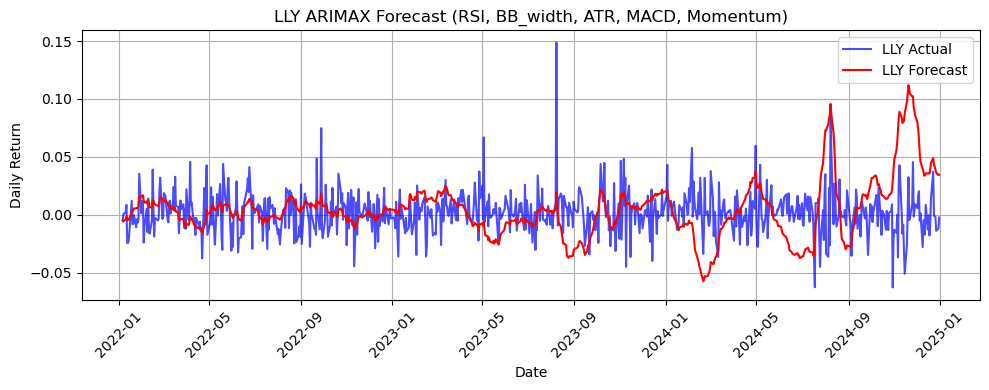

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


JNJ ARIMAX(1,0,1) → MAE=0.00677, RMSE=0.00902


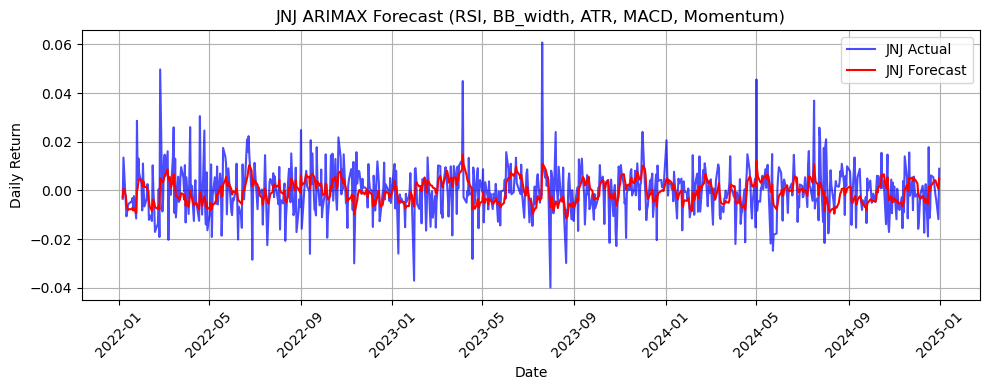

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


NVO ARIMAX(1,0,1) → MAE=0.01297, RMSE=0.01890


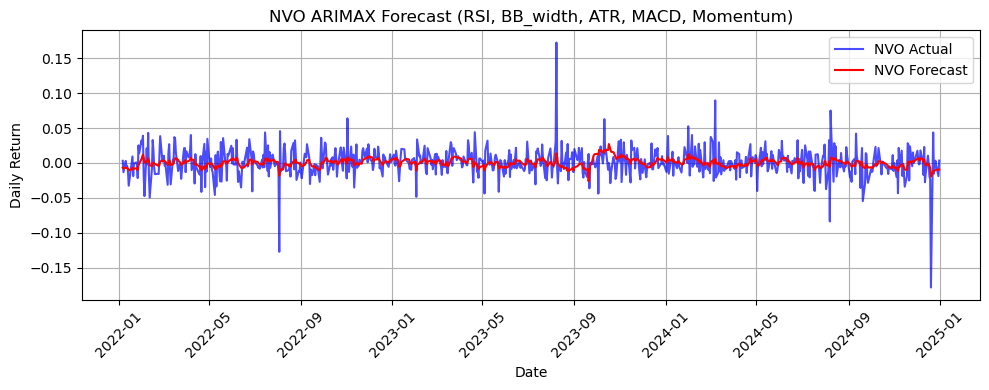

In [21]:
# function for running arimax model for all pharma tech stocks
def run_arimax1(df, ticker, features):
    # 80/20 split
    split = int(len(df) * 0.8)
    train = df.iloc[:split]
    test  = df.iloc[split:]
    
    y_train = train['Return'].astype(float)
    y_test  = test ['Return'].astype(float)
    X_train = train[features].astype(float)
    X_test  = test [features].astype(float)
    
    y_train.index = X_train.index
    y_test.index  = X_test.index
    
    model    = ARIMA(endog=y_train, exog=X_train, order=(1,0,1)).fit()
    forecast = model.forecast(steps=len(X_test), exog=X_test)
    
    mae  = mean_absolute_error(y_test, forecast)
    rmse = np.sqrt(mean_squared_error(y_test, forecast))
    print(f"{ticker} ARIMAX(1,0,1) → MAE={mae:.5f}, RMSE={rmse:.5f}")

    plt.figure(figsize=(10,4))
    plt.plot(test['date'], y_test,    label=f'{ticker} Actual',   color='blue', alpha=0.7)
    plt.plot(test['date'], forecast,  label=f'{ticker} Forecast', color='red',  linestyle='-')
    
    y_min, y_max = min(y_test.min(), forecast.min()), max(y_test.max(), forecast.max())
    pad = (y_max - y_min) * 0.05
    plt.ylim(y_min - pad, y_max + pad)
    
    plt.title(f'{ticker} ARIMAX Forecast ({", ".join(features)})')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# common feature list
features1 = ['RSI','BB_width','ATR','MACD','Momentum']

run_arimax1(lly_df, 'LLY', features1)
run_arimax1(jnj_df, 'JNJ', features1)
run_arimax1(nvo_df, 'NVO', features1)


FINANCIAL SERVICE STOCKS (JPM, V, MA)

In [22]:
permnoJPM_df = conn.raw_sql("""
    SELECT permno
    FROM crsp.msenames
    WHERE ticker = 'JPM'
      AND namedt <= '2024-12-31'
      AND nameendt >= '2010-01-01'
    LIMIT 1
""")
jpm_permno = int(permnoJPM_df.loc[0, 'permno'])
print("JPM permno:", jpm_permno)

JPM permno: 47896


In [23]:
jpm_df = conn.raw_sql(f"""
    SELECT
      dlycaldt AS date,
      dlyclose AS close,
      dlyvol   AS volume,
      dlyretx  AS return,   -- price‐only return
      dlyhigh  AS high,
      dlylow   AS low
    FROM crsp.dsf_v2
    WHERE permno = {jpm_permno}
      AND dlycaldt BETWEEN '2010-01-01' AND '2024-12-31'
""")

jpm_df['date'] = pd.to_datetime(jpm_df['date'])
jpm_df.rename(columns={
    'close':'Close',
    'volume':'Volume',
    'return':'Return',
    'high':'High',
    'low':'Low'
}, inplace=True)

#dropping any bad rows
for col in ['Close','Volume','Return','High','Low']:
    jpm_df[col] = pd.to_numeric(jpm_df[col], errors='coerce')
jpm_df.dropna(subset=['Close','Volume','Return','High','Low'], inplace=True)
jpm_df = jpm_df.sort_values('date').reset_index(drop=True)

print(jpm_df[['date','Close','Return']].head())
print("Total rows:", len(jpm_df))
print("Return range:", jpm_df['Return'].min(), "to", jpm_df['Return'].max())


        date  Close    Return
0 2010-01-04  42.85  0.028318
1 2010-01-05  43.68   0.01937
2 2010-01-06  43.92  0.005495
3 2010-01-07  44.79  0.019809
4 2010-01-08  44.68 -0.002456
Total rows: 3774
Return range: -0.149649 to 0.180125


In [24]:
# RSI
jpm_df['RSI'] = ta.momentum.RSIIndicator(jpm_df['Close'], window=14).rsi()

# Bollinger Bandwidth
bb = ta.volatility.BollingerBands(jpm_df['Close'], window=20, window_dev=2)
jpm_df['BB_width'] = bb.bollinger_wband()

# ATR
jpm_df['ATR'] = ta.volatility.AverageTrueRange(
    high=jpm_df['High'], 
    low =jpm_df['Low'], 
    close=jpm_df['Close'], 
    window=14
).average_true_range()

# MACD
jpm_df['MACD'] = ta.trend.MACD(
    jpm_df['Close'], 
    window_slow=26, 
    window_fast=12, 
    window_sign=9
).macd()

# Momentum (10-day ROC)
jpm_df['Momentum'] = ta.momentum.ROCIndicator(jpm_df['Close'], window=10).roc()

# Drop any rows with NaNs in the new indicators
jpm_df.dropna(subset=['RSI','BB_width','ATR','MACD','Momentum'], inplace=True)
jpm_df.reset_index(drop=True, inplace=True)

# Preview the first few rows
print(jpm_df[['date','Return','RSI','BB_width','ATR','MACD','Momentum']].head())

        date    Return        RSI   BB_width       ATR      MACD  Momentum
0 2010-02-09  0.018302  35.909099  22.258277  1.295626 -1.210312 -0.130073
1 2010-02-10  0.012503  39.584677  21.620821  1.282367 -1.158397 -1.169591
2 2010-02-11  0.003859  40.728632  19.960307  1.262912 -1.092555 -1.165147
3 2010-02-12 -0.001794  40.344713  17.141513  1.231276 -1.034103  0.025681
4 2010-02-16  0.028755  48.680179  14.691533  1.242613 -0.887178   1.11027


In [25]:
permnoV_df = conn.raw_sql("""
    SELECT permno
    FROM crsp.msenames
    WHERE ticker = 'V'
      AND namedt <= '2024-12-31'
      AND nameendt >= '2010-01-01'
    LIMIT 1
""")
v_permno = int(permnoV_df.loc[0, 'permno'])
print("V permno:", v_permno)

V permno: 92611


In [26]:
v_df = conn.raw_sql(f"""
    SELECT
      dlycaldt AS date,
      dlyclose AS close,
      dlyvol   AS volume,
      dlyretx  AS return,   -- price‐only return
      dlyhigh  AS high,
      dlylow   AS low
    FROM crsp.dsf_v2
    WHERE permno = {v_permno}
      AND dlycaldt BETWEEN '2010-01-01' AND '2024-12-31'
""")

v_df['date'] = pd.to_datetime(v_df['date'])
v_df.rename(columns={
    'close':'Close',
    'volume':'Volume',
    'return':'Return',
    'high':'High',
    'low':'Low'
}, inplace=True)

#dropping any bad rows
for col in ['Close','Volume','Return','High','Low']:
    v_df[col] = pd.to_numeric(v_df[col], errors='coerce')
v_df.dropna(subset=['Close','Volume','Return','High','Low'], inplace=True)
v_df = v_df.sort_values('date').reset_index(drop=True)

print(v_df[['date','Close','Return']].head())
print("Total rows:", len(v_df))
print("Return range:", v_df['Return'].min(), "to", v_df['Return'].max())

        date  Close    Return
0 2010-01-04  88.14  0.007775
1 2010-01-05  87.13 -0.011459
2 2010-01-06  85.96 -0.013428
3 2010-01-07  86.76  0.009307
4 2010-01-08   87.0  0.002766
Total rows: 3774
Return range: -0.135472 to 0.149973


In [27]:
# RSI
v_df['RSI'] = ta.momentum.RSIIndicator(v_df['Close'], window=14).rsi()

# Bollinger Bandwidth
bb = ta.volatility.BollingerBands(v_df['Close'], window=20, window_dev=2)
v_df['BB_width'] = bb.bollinger_wband()

# ATR
v_df['ATR'] = ta.volatility.AverageTrueRange(
    high=v_df['High'], 
    low =v_df['Low'], 
    close=v_df['Close'], 
    window=14
).average_true_range()

# MACD
v_df['MACD'] = ta.trend.MACD(
    v_df['Close'], 
    window_slow=26, 
    window_fast=12, 
    window_sign=9
).macd()

# Momentum (10-day ROC)
v_df['Momentum'] = ta.momentum.ROCIndicator(v_df['Close'], window=10).roc()

# Drop any rows with NaNs in the new indicators
v_df.dropna(subset=['RSI','BB_width','ATR','MACD','Momentum'], inplace=True)
v_df.reset_index(drop=True, inplace=True)

# Preview the first few rows
print(v_df[['date','Return','RSI','BB_width','ATR','MACD','Momentum']].head())


        date    Return        RSI  BB_width       ATR      MACD  Momentum
0 2010-02-09  0.002649  43.011869  9.592698  2.164972 -1.075350  2.612446
1 2010-02-10  0.004443  45.128071  9.338007  2.083188 -0.982097 -0.321773
2 2010-02-11  0.017934  52.783063  8.823620  2.074389 -0.778185  3.012704
3 2010-02-12 -0.004228  50.946096  8.052215  2.032647 -0.638275  3.352432
4 2010-02-16  0.012975  55.986523  7.973534  1.970315 -0.433636  2.653598


In [28]:
permnoMA_df = conn.raw_sql("""
    SELECT permno
    FROM crsp.msenames
    WHERE ticker = 'MA'
      AND namedt <= '2024-12-31'
      AND nameendt >= '2010-01-01'
    LIMIT 1
""")
ma_permno = int(permnoMA_df.loc[0, 'permno'])
print("MA permno:", ma_permno)

MA permno: 91233


In [29]:
ma_df = conn.raw_sql(f"""
    SELECT
      dlycaldt AS date,
      dlyclose AS close,
      dlyvol   AS volume,
      dlyretx  AS return,   -- price‐only return
      dlyhigh  AS high,
      dlylow   AS low
    FROM crsp.dsf_v2
    WHERE permno = {ma_permno}
      AND dlycaldt BETWEEN '2010-01-01' AND '2024-12-31'
""")

ma_df['date'] = pd.to_datetime(ma_df['date'])
ma_df.rename(columns={
    'close':'Close',
    'volume':'Volume',
    'return':'Return',
    'high':'High',
    'low':'Low'
}, inplace=True)

#dropping any bad rows
for col in ['Close','Volume','Return','High','Low']:
    ma_df[col] = pd.to_numeric(ma_df[col], errors='coerce')
ma_df.dropna(subset=['Close','Volume','Return','High','Low'], inplace=True)
ma_df = ma_df.sort_values('date').reset_index(drop=True)

print(ma_df[['date','Close','Return']].head())
print("Total rows:", len(ma_df))
print("Return range:", ma_df['Return'].min(), "to", ma_df['Return'].max())

        date   Close    Return
0 2010-01-04  256.84   0.00336
1 2010-01-05  256.08 -0.002959
2 2010-01-06  255.56 -0.002031
3 2010-01-07  253.89 -0.006535
4 2010-01-08  253.98  0.000354
Total rows: 3774
Return range: -0.127255 to 0.166109


In [30]:
# RSI
ma_df['RSI'] = ta.momentum.RSIIndicator(ma_df['Close'], window=14).rsi()

# Bollinger Bandwidth
bb = ta.volatility.BollingerBands(ma_df['Close'], window=20, window_dev=2)
ma_df['BB_width'] = bb.bollinger_wband()

# ATR
ma_df['ATR'] = ta.volatility.AverageTrueRange(
    high=ma_df['High'],
    low =ma_df['Low'],
    close=ma_df['Close'],
    window=14
).average_true_range()

# MACD
ma_df['MACD'] = ta.trend.MACD(
    ma_df['Close'],
    window_slow=26,
    window_fast=12,
    window_sign=9
).macd()

# Momentum (10-day ROC)
ma_df['Momentum'] = ta.momentum.ROCIndicator(ma_df['Close'], window=10).roc()

# Drop any rows with nans
ma_df.dropna(subset=['RSI','BB_width','ATR','MACD','Momentum'], inplace=True)
ma_df.reset_index(drop=True, inplace=True)

# Preview the first few rows
print(ma_df[['date','Return','RSI','BB_width','ATR','MACD','Momentum']].head())

        date    Return        RSI   BB_width       ATR      MACD   Momentum
0 2010-02-09  -0.01303  28.450796  21.906203  7.694360 -7.699051 -10.120269
1 2010-02-10   0.01544  32.798989  23.277770  7.584763 -8.047700 -11.481294
2 2010-02-11  0.009255  35.373527  24.030782  7.362280 -8.061626  -8.198036
3 2010-02-12 -0.015371  33.085460  24.619971  7.147117 -8.261463  -9.771909
4 2010-02-16 -0.000798  32.968025  24.679305  6.898752 -8.338243 -11.096204


JPM ARIMAX(1,0,1) → MAE=0.01006, RMSE=0.01394


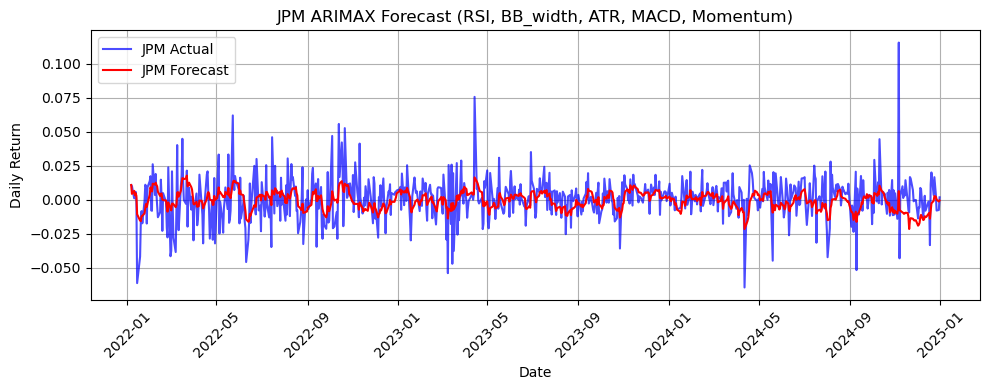

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


V ARIMAX(1,0,1) → MAE=0.00863, RMSE=0.01213


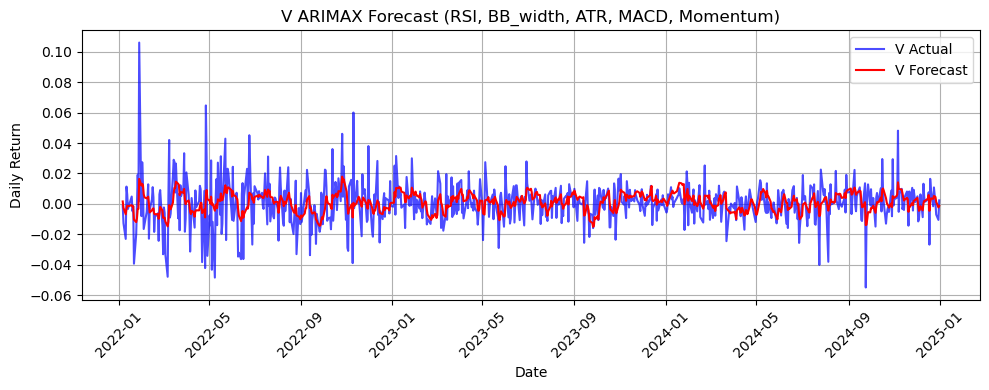

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MA ARIMAX(1,0,1) → MAE=0.00953, RMSE=0.01321


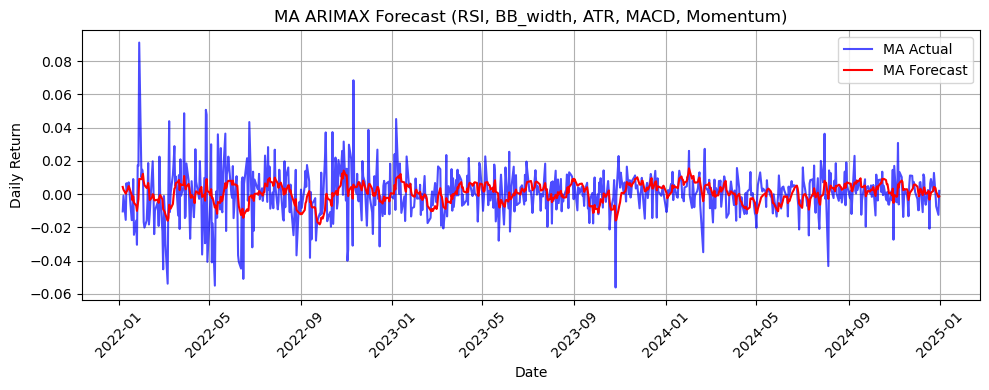

In [31]:
# function for running arimax model for all pharma tech stocks
def run_arimax2(df, ticker, features):
    # 80/20 split
    split = int(len(df) * 0.8)
    train = df.iloc[:split]
    test  = df.iloc[split:]
    
    y_train = train['Return'].astype(float)
    y_test  = test ['Return'].astype(float)
    X_train = train[features].astype(float)
    X_test  = test [features].astype(float)
    
    y_train.index = X_train.index
    y_test.index  = X_test.index
    
    model    = ARIMA(endog=y_train, exog=X_train, order=(1,0,1)).fit()
    forecast = model.forecast(steps=len(X_test), exog=X_test)
    
    mae  = mean_absolute_error(y_test, forecast)
    rmse = np.sqrt(mean_squared_error(y_test, forecast))
    print(f"{ticker} ARIMAX(1,0,1) → MAE={mae:.5f}, RMSE={rmse:.5f}")

    plt.figure(figsize=(10,4))
    plt.plot(test['date'], y_test,    label=f'{ticker} Actual',   color='blue', alpha=0.7)
    plt.plot(test['date'], forecast,  label=f'{ticker} Forecast', color='red',  linestyle='-')
    
    y_min, y_max = min(y_test.min(), forecast.min()), max(y_test.max(), forecast.max())
    pad = (y_max - y_min) * 0.05
    plt.ylim(y_min - pad, y_max + pad)
    
    plt.title(f'{ticker} ARIMAX Forecast ({", ".join(features)})')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# common feature list
features2 = ['RSI','BB_width','ATR','MACD','Momentum']

run_arimax2(jpm_df, 'JPM', features2)
run_arimax2(v_df, 'V', features2)
run_arimax2(ma_df, 'MA', features2)


LAST 30 DAYS FORECAST

In [35]:
# function for last 30 days forecast for all stocks
def plot_last_30_arimax(df, ticker,
                        exog_vars=['RSI','BB_width','ATR','MACD','Momentum'],
                        order=(1,0,1), train_frac=0.8, last_n=30):
    
    split = int(len(df) * train_frac)
    train, test = df.iloc[:split], df.iloc[split:]
    
    y_train = train['Return'].astype(float)
    y_test  = test ['Return'].astype(float)
    X_train = train[exog_vars].astype(float)
    X_test  = test [exog_vars].astype(float)
    
    y_train.index = X_train.index
    y_test.index  = X_test.index
    
    model    = ARIMA(endog=y_train, exog=X_train, order=order).fit()
    forecast = model.forecast(steps=len(X_test), exog=X_test)
    
    dates_last  = test['date'].iloc[-last_n:].reset_index(drop=True)
    actual_last = y_test.iloc[-last_n:].reset_index(drop=True)
    pred_last   = pd.Series(forecast.values[-last_n:], name='Forecast')
    
    mae  = mean_absolute_error(actual_last, pred_last)
    rmse = np.sqrt(mean_squared_error(actual_last, pred_last))
    mape = (np.abs((actual_last - pred_last) / actual_last)
            .replace([np.inf, -np.inf], np.nan)
            .dropna()
            .mean() * 100)
    
    print(f"\n{ticker} — Last {last_n} Days — MAE={mae:.4f}, RMSE={rmse:.4f}, MAPE={mape:.2f}%")
    
    tab = pd.DataFrame({
        'Date':      dates_last.dt.strftime('%Y-%m-%d'),
        'Actual':    actual_last.round(4),
        'Forecast':  pred_last.round(4)
    })
    print(tab.to_string(index=False))
    
    plt.figure(figsize=(10,4))
    plt.plot(dates_last, actual_last, marker='o', label='Actual',   color='blue')
    plt.plot(dates_last, pred_last,   marker='x', label='Forecast', color='red', linestyle='--')
    plt.title(f"{ticker} ARIMAX Forecast (Last {last_n} Days)")
    plt.xlabel("Date")
    plt.ylabel("Daily Return")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


TECH STOCK


NVDA — Last 30 Days — MAE=0.0167, RMSE=0.0206, MAPE=116.49%
      Date  Actual  Forecast
2024-11-18 -0.0129   -0.0008
2024-11-19  0.0489    0.0055
2024-11-20 -0.0076    0.0027
2024-11-21  0.0053    0.0029
2024-11-22 -0.0322   -0.0024
2024-11-25 -0.0418   -0.0078
2024-11-26  0.0066   -0.0071
2024-11-27 -0.0115   -0.0081
2024-11-29  0.0215   -0.0044
2024-12-02  0.0027   -0.0027
2024-12-03  0.0118   -0.0002
2024-12-04  0.0348    0.0036
2024-12-05 -0.0006    0.0035
2024-12-06 -0.0181   -0.0001
2024-12-09 -0.0255   -0.0032
2024-12-10 -0.0269   -0.0057
2024-12-11  0.0314   -0.0005
2024-12-12 -0.0141   -0.0022
2024-12-13 -0.0225   -0.0059
2024-12-16 -0.0168   -0.0082
2024-12-17 -0.0122   -0.0101
2024-12-18 -0.0114   -0.0123
2024-12-19  0.0137   -0.0096
2024-12-20  0.0308   -0.0035
2024-12-23  0.0369    0.0030
2024-12-24  0.0039    0.0042
2024-12-26 -0.0021    0.0025
2024-12-27 -0.0209   -0.0008
2024-12-30  0.0035    0.0005
2024-12-31 -0.0233   -0.0029


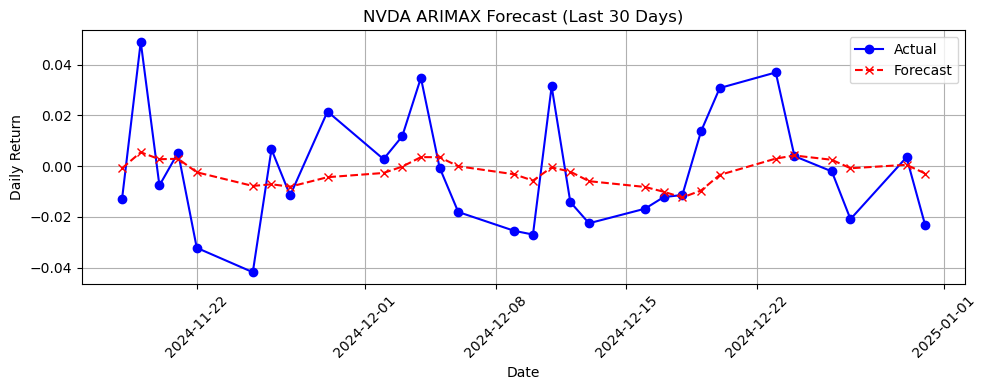

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



MSFT — Last 30 Days — MAE=0.0075, RMSE=0.0093, MAPE=196.84%
      Date  Actual  Forecast
2024-11-18  0.0018    0.0047
2024-11-19  0.0049    0.0057
2024-11-20 -0.0055    0.0041
2024-11-21 -0.0063    0.0033
2024-11-22  0.0100    0.0061
2024-11-25  0.0043    0.0072
2024-11-26  0.0220    0.0096
2024-11-27 -0.0117    0.0056
2024-11-29  0.0011    0.0050
2024-12-02  0.0178    0.0085
2024-12-03  0.0005    0.0067
2024-12-04  0.0144    0.0070
2024-12-05  0.0119    0.0067
2024-12-06  0.0021    0.0048
2024-12-09  0.0055    0.0032
2024-12-10 -0.0060   -0.0002
2024-12-11  0.0128   -0.0006
2024-12-12  0.0013   -0.0011
2024-12-13 -0.0051   -0.0035
2024-12-16  0.0097   -0.0034
2024-12-17  0.0064   -0.0034
2024-12-18 -0.0376   -0.0123
2024-12-19 -0.0008   -0.0106
2024-12-20 -0.0010   -0.0083
2024-12-23 -0.0031   -0.0074
2024-12-24  0.0094   -0.0038
2024-12-26 -0.0028   -0.0043
2024-12-27 -0.0173   -0.0061
2024-12-30 -0.0132   -0.0057
2024-12-31 -0.0078   -0.0047


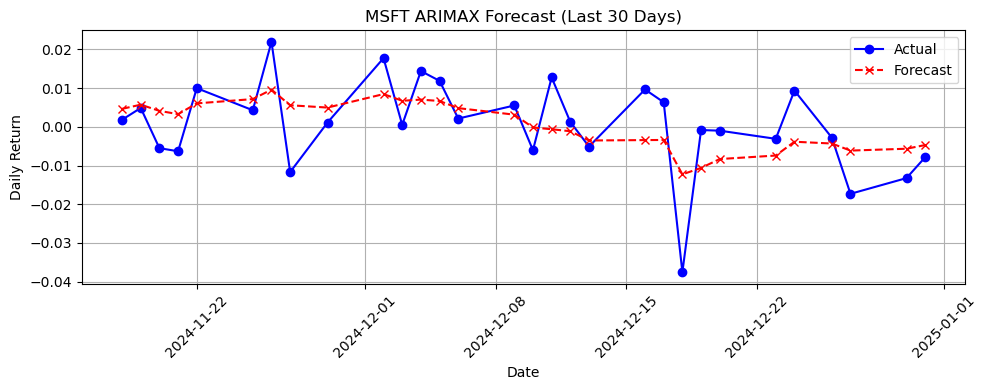


AAPL — Last 30 Days — MAE=0.0070, RMSE=0.0091, MAPE=496.37%
      Date  Actual  Forecast
2024-11-18  0.0134    0.0006
2024-11-19  0.0011    0.0007
2024-11-20  0.0032    0.0014
2024-11-21 -0.0021    0.0002
2024-11-22  0.0059    0.0017
2024-11-25  0.0131    0.0049
2024-11-26  0.0094    0.0067
2024-11-27 -0.0006    0.0061
2024-11-29  0.0102    0.0075
2024-12-02  0.0095    0.0094
2024-12-03  0.0128    0.0108
2024-12-04  0.0015    0.0107
2024-12-05  0.0001    0.0103
2024-12-06 -0.0008    0.0098
2024-12-09  0.0161    0.0122
2024-12-10  0.0041    0.0122
2024-12-11 -0.0052    0.0095
2024-12-12  0.0060    0.0104
2024-12-13  0.0007    0.0102
2024-12-16  0.0117    0.0118
2024-12-17  0.0097    0.0127
2024-12-18 -0.0214    0.0038
2024-12-19  0.0070    0.0054
2024-12-20  0.0188    0.0087
2024-12-23  0.0031    0.0086
2024-12-24  0.0115    0.0101
2024-12-26  0.0032    0.0106
2024-12-27 -0.0132    0.0055
2024-12-30 -0.0133    0.0015
2024-12-31 -0.0071   -0.0005


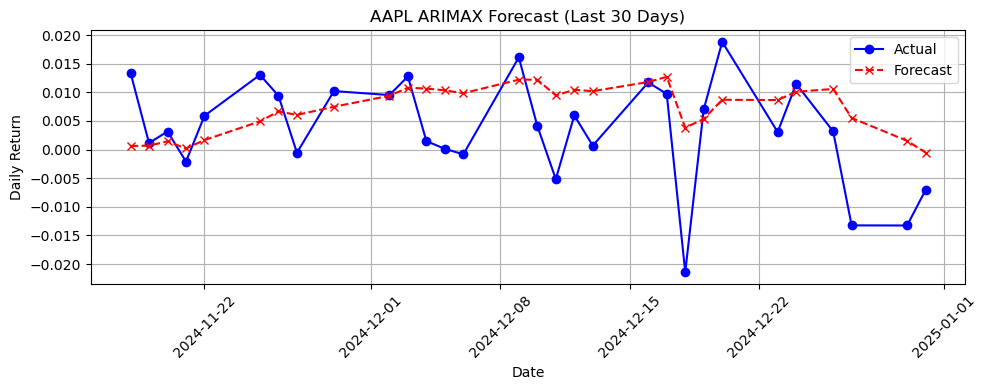

In [36]:
plot_last_30_arimax(nvda_df, 'NVDA')
plot_last_30_arimax(msft_df, 'MSFT')
plot_last_30_arimax(aapl_df, 'AAPL')


PHARMA STOCKS


LLY — Last 30 Days — MAE=0.0599, RMSE=0.0657, MAPE=1565.58%
      Date  Actual  Forecast
2024-11-18 -0.0255    0.0976
2024-11-19  0.0035    0.1045
2024-11-20  0.0324    0.1119
2024-11-21 -0.0046    0.1087
2024-11-22 -0.0025    0.1045
2024-11-25  0.0093    0.1020
2024-11-26  0.0455    0.1022
2024-11-27 -0.0014    0.0927
2024-11-29  0.0091    0.0856
2024-12-02  0.0056    0.0796
2024-12-03  0.0169    0.0734
2024-12-04  0.0203    0.0656
2024-12-05 -0.0051    0.0533
2024-12-06  0.0013    0.0459
2024-12-09 -0.0280    0.0396
2024-12-10 -0.0050    0.0374
2024-12-11 -0.0044    0.0338
2024-12-12 -0.0172    0.0338
2024-12-13  0.0087    0.0357
2024-12-16 -0.0128    0.0358
2024-12-17 -0.0005    0.0360
2024-12-18 -0.0179    0.0356
2024-12-19 -0.0094    0.0385
2024-12-20  0.0135    0.0449
2024-12-23  0.0371    0.0489
2024-12-24 -0.0008    0.0437
2024-12-26 -0.0019    0.0394
2024-12-27 -0.0138    0.0364
2024-12-30 -0.0119    0.0342
2024-12-31 -0.0024    0.0346


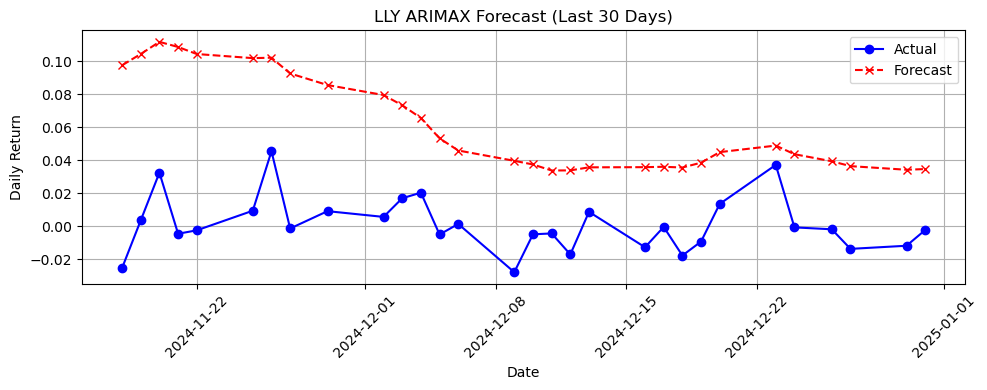

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



JNJ — Last 30 Days — MAE=0.0066, RMSE=0.0081, MAPE=116.17%
      Date  Actual  Forecast
2024-11-18  0.0050    0.0024
2024-11-19 -0.0114   -0.0002
2024-11-20  0.0007    0.0003
2024-11-21  0.0156    0.0053
2024-11-22 -0.0021    0.0046
2024-11-25  0.0039    0.0053
2024-11-26 -0.0081    0.0039
2024-11-27  0.0057    0.0049
2024-11-29 -0.0025    0.0044
2024-12-02 -0.0014    0.0028
2024-12-03 -0.0158   -0.0013
2024-12-04 -0.0124   -0.0024
2024-12-05 -0.0063   -0.0028
2024-12-06 -0.0014   -0.0034
2024-12-09  0.0019   -0.0022
2024-12-10 -0.0025   -0.0027
2024-12-11 -0.0174   -0.0048
2024-12-12 -0.0027   -0.0049
2024-12-13  0.0026   -0.0034
2024-12-16 -0.0189   -0.0057
2024-12-17  0.0178    0.0016
2024-12-18 -0.0113    0.0005
2024-12-19 -0.0081   -0.0002
2024-12-20  0.0062    0.0019
2024-12-23  0.0055    0.0032
2024-12-24  0.0040    0.0040
2024-12-26 -0.0019    0.0042
2024-12-27 -0.0036    0.0032
2024-12-30 -0.0118    0.0006
2024-12-31  0.0089    0.0048


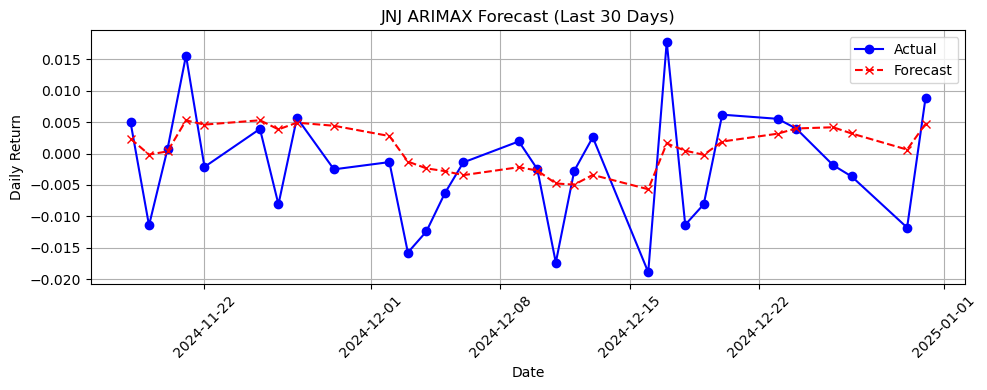

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



NVO — Last 30 Days — MAE=0.0183, RMSE=0.0337, MAPE=130.63%
      Date  Actual  Forecast
2024-11-18 -0.0190   -0.0101
2024-11-19  0.0283   -0.0036
2024-11-20  0.0257    0.0019
2024-11-21 -0.0251   -0.0017
2024-11-22  0.0237    0.0022
2024-11-25 -0.0048    0.0008
2024-11-26  0.0150    0.0032
2024-11-27  0.0000    0.0026
2024-11-29  0.0063    0.0035
2024-12-02  0.0175    0.0065
2024-12-03  0.0049    0.0068
2024-12-04 -0.0021    0.0050
2024-12-05 -0.0014    0.0035
2024-12-06  0.0179    0.0066
2024-12-09  0.0028    0.0058
2024-12-10 -0.0170    0.0015
2024-12-11  0.0229    0.0049
2024-12-12 -0.0276   -0.0010
2024-12-13 -0.0153   -0.0034
2024-12-16  0.0103   -0.0015
2024-12-17 -0.0004   -0.0013
2024-12-18 -0.0190   -0.0041
2024-12-19 -0.0238   -0.0071
2024-12-20 -0.1783   -0.0194
2024-12-23  0.0436   -0.0121
2024-12-24 -0.0151   -0.0113
2024-12-26  0.0032   -0.0102
2024-12-27 -0.0032   -0.0094
2024-12-30 -0.0188   -0.0099
2024-12-31  0.0034   -0.0093


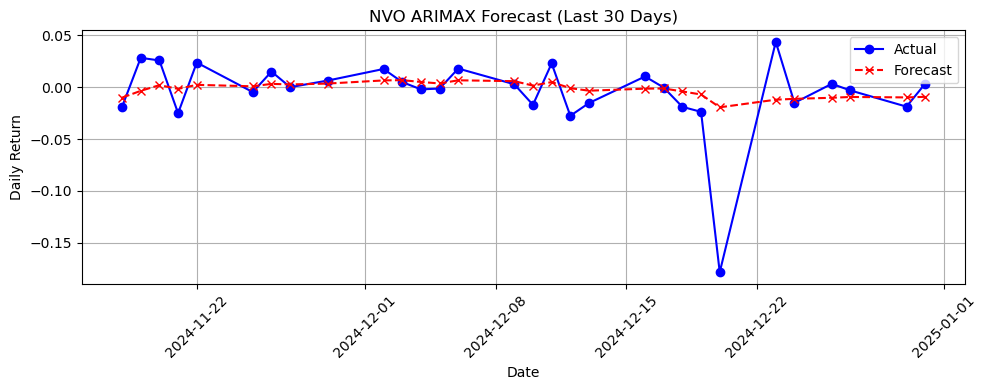

In [37]:
plot_last_30_arimax(lly_df, 'LLY')
plot_last_30_arimax(jnj_df, 'JNJ')
plot_last_30_arimax(nvo_df, 'NVO')

FINANCIAL STOCKS


JPM — Last 30 Days — MAE=0.0124, RMSE=0.0147, MAPE=454.70%
      Date  Actual  Forecast
2024-11-18 -0.0011   -0.0099
2024-11-19 -0.0079   -0.0127
2024-11-20 -0.0095   -0.0217
2024-11-21  0.0165   -0.0155
2024-11-22  0.0155   -0.0137
2024-11-25  0.0070   -0.0141
2024-11-26 -0.0013   -0.0149
2024-11-27 -0.0007   -0.0155
2024-11-29 -0.0003   -0.0152
2024-12-02 -0.0139   -0.0192
2024-12-03 -0.0058   -0.0186
2024-12-04 -0.0058   -0.0171
2024-12-05  0.0085   -0.0129
2024-12-06  0.0077   -0.0113
2024-12-09 -0.0144   -0.0151
2024-12-10 -0.0039   -0.0147
2024-12-11  0.0028   -0.0123
2024-12-12 -0.0082   -0.0129
2024-12-13 -0.0066   -0.0128
2024-12-16 -0.0015   -0.0105
2024-12-17 -0.0051   -0.0098
2024-12-18 -0.0335   -0.0141
2024-12-19  0.0112   -0.0086
2024-12-20  0.0199   -0.0028
2024-12-23  0.0033   -0.0009
2024-12-24  0.0164    0.0026
2024-12-26  0.0034    0.0021
2024-12-27 -0.0081   -0.0001
2024-12-30 -0.0077   -0.0015
2024-12-31  0.0016   -0.0007


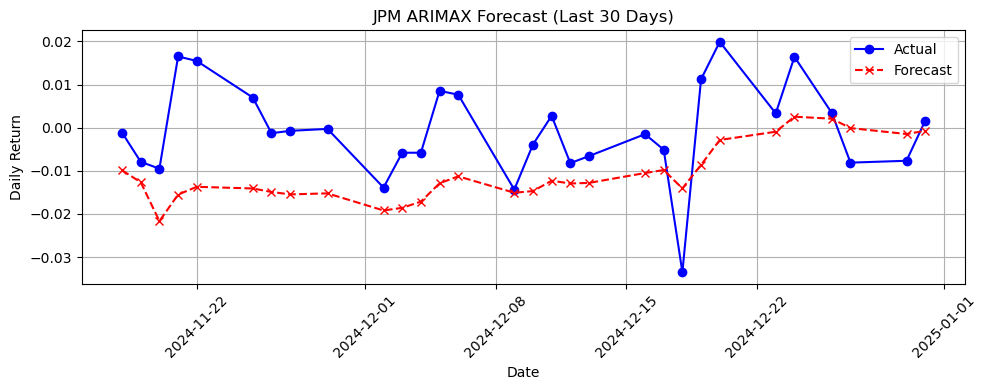

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



V — Last 30 Days — MAE=0.0059, RMSE=0.0077, MAPE=202.72%
      Date  Actual  Forecast
2024-11-18  0.0081    0.0040
2024-11-19 -0.0010    0.0032
2024-11-20 -0.0143   -0.0052
2024-11-21  0.0082   -0.0022
2024-11-22  0.0001   -0.0019
2024-11-25  0.0106    0.0006
2024-11-26 -0.0044   -0.0008
2024-11-27  0.0092    0.0020
2024-11-29  0.0012    0.0026
2024-12-02  0.0050    0.0039
2024-12-03 -0.0115   -0.0016
2024-12-04 -0.0099   -0.0045
2024-12-05 -0.0026   -0.0040
2024-12-06  0.0062   -0.0015
2024-12-09 -0.0087   -0.0043
2024-12-10  0.0132    0.0002
2024-12-11  0.0045    0.0019
2024-12-12  0.0014    0.0019
2024-12-13  0.0016    0.0024
2024-12-16  0.0037    0.0033
2024-12-17  0.0076    0.0058
2024-12-18 -0.0268   -0.0046
2024-12-19  0.0165    0.0013
2024-12-20  0.0090    0.0036
2024-12-23 -0.0015    0.0033
2024-12-24  0.0108    0.0052
2024-12-26  0.0008    0.0046
2024-12-27 -0.0070    0.0014
2024-12-30 -0.0105   -0.0023
2024-12-31  0.0023   -0.0013


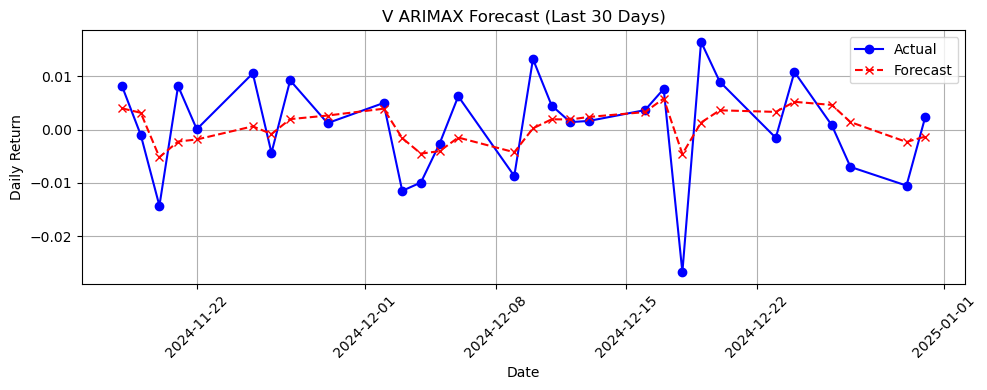

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



MA — Last 30 Days — MAE=0.0065, RMSE=0.0076, MAPE=132.24%
      Date  Actual  Forecast
2024-11-18 -0.0005    0.0030
2024-11-19 -0.0042    0.0017
2024-11-20 -0.0133   -0.0035
2024-11-21  0.0050   -0.0015
2024-11-22  0.0112    0.0008
2024-11-25  0.0110    0.0027
2024-11-26  0.0036    0.0034
2024-11-27  0.0074    0.0056
2024-11-29  0.0011    0.0058
2024-12-02 -0.0030    0.0045
2024-12-03 -0.0097    0.0012
2024-12-04 -0.0096   -0.0013
2024-12-05  0.0070    0.0015
2024-12-06  0.0072    0.0033
2024-12-09 -0.0109   -0.0006
2024-12-10  0.0118    0.0020
2024-12-11  0.0103    0.0041
2024-12-12 -0.0038    0.0023
2024-12-13 -0.0064    0.0002
2024-12-16  0.0025    0.0010
2024-12-17  0.0013    0.0019
2024-12-18 -0.0208   -0.0033
2024-12-19  0.0064   -0.0015
2024-12-20  0.0091    0.0008
2024-12-23  0.0018    0.0019
2024-12-24  0.0128    0.0043
2024-12-26  0.0008    0.0037
2024-12-27 -0.0074    0.0014
2024-12-30 -0.0125   -0.0018
2024-12-31  0.0019   -0.0013


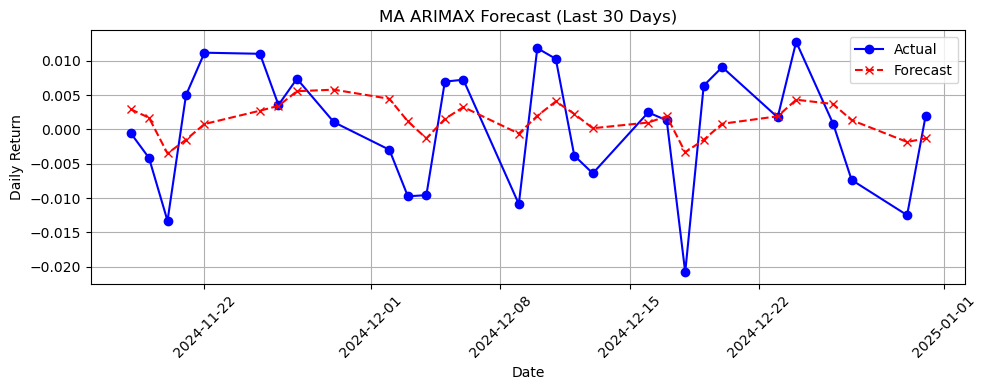

In [38]:
plot_last_30_arimax(jpm_df, 'JPM')
plot_last_30_arimax(v_df, 'V')
plot_last_30_arimax(ma_df, 'MA')